In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import scipy
# from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

### Background & Intro

In [3]:
print("Hi I'm Zekai!")

Hi I'm Zekai!


In [4]:
print("Hi I'm Violet!")

Hi I'm Violet!


At the beginning of this semester, we talked about debates of using COMPAS, a commercial algorithm used by judges and parole officiers for scoring criminal defendant's likehood of reoffending.

<img src="images/northpointe_marketing.png">

Its claim is that **You bring the wisdom and experience. We bring the evidence-based expertise. Together we advance justice.** 

It seems pioneering and promising. 

And here is a challenge against it. We discussed ProPublica report Machine Bias in class. ProPublica is arguing that compas scoring algorithm is biased against african american, as it is particularly likely to falsely flag black defendants as future criminals, almost twice the rate as white defendants. 

<img src="images/propublica.png">

As shown in the picture, being both arrested for drug possession, Fudget, a white defendant, receives a score of 3, which belongs to low risk; while Parker, a black defendant, receives a score of 10, which belongs to high risk category.

### Research Question

**We believe that algorithm based tools, such as COMPAS, help judges decide.**

Human are prone to mistake because when tired or distracted, while algorithm just iterate through what it is programmed to do and thus incapable of neglecting anything that it is supposed to do. Moreover, human judges may have bias against certain group or groups because of their idiosyncratic background or prior experiences. Judge A, from background A’, may make a decision A’’ over subject S, while Judge B, from background B’, may make a decision B’’ over the same subject S. Furthermore, in a less open and democratic environment, a judge’s decision may be affected by politics or bribery. It seems that algorithm does not have such flaws, because it is the same algorithm treating various subjects.

Thus, we do believe in Data's power to transform law practice and advance justice. 

**If we assume that developers of COMPAS are not inherently biased, then why do we see the highly biased results given by ProPublica.**

**Then Two potential sources of bias: Model / Dataset**

### Data Collection

Northpointe does not release data itself, because it is a commmercial company and considers COMPAS proprietary. However, we still managed to gain acess to COMPAS scores for Broward county in Florida from 2013 to 2014. This data was made accessible by propublica, who made a open record request to Broward County. 

<img src = "images/database.png">

It is worth noticing that it is not all Broward County residents have compas score. Only those who were arrested have compas score.  We are interested in how it compare to broward demoghraphics. Thus, we visit broward.org and 2015 5-year American community survey.  

<img src = "images/broward.org.png">
<img src = "images/five_year.png">

### Data Exploration

We find a significant mismatch between those who were aressted and thus received a compas score and the general Broward demographics.

In [5]:
compas_two_year = pd.read_csv('data/compas-scores-two-years.csv')
compas_two_year.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


#### Summary of our data 

In [6]:
compas_two_year.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

#### Features

`Agency_Text` describes the context where people was assessed by COMPAS. 

`LastName` and `FirstName` are name infos. 

`Sex_Code_Text` gives gender infos.

`Ethnic_Code_Text` gives racial infos. 

`DateOfBirth` gives age infos. 

`AssessmentReason` are all `intake`.

`Language` are either English or Spanish.

`MaritalStatus` describes marital status. 

`DecileScore` are in a scale of 1 to 10 and "ScoreText" gives a category based on DecileScore. 

In [7]:
demo = pd.read_csv('data/broward-demographics.csv').set_index('Index')
demo['Total'] = demo['Total'].str.replace(r',', '').astype(np.int64)
demo['Male'] = demo['Male'].str.replace(r',', '').astype(np.int64)
demo['Female'] = demo['Female'].str.replace(r',', '').astype(np.int64)
demo

,Total,Male,Female
Index,,,
Total population,1890416,920265,970151
Under 5 years,110377,56214,54163
5 to 9 years,110501,57916,52585
10 to 14 years,113943,56133,57810
15 to 19 years,113616,58402,55214
20 to 24 years,114806,58428,56378
25 to 29 years,127204,63345,63859
30 to 34 years,127613,62553,65060
35 to 39 years,125386,62107,63279


In [8]:
races = pd.read_csv('data/broward-races.csv').set_index('Index')
races = races.drop('Total')
races

,Number
Index,
African-American,366460
Asian,44518
Caucasian,863973
Hispanic,417721
Native American,4684
Other,50710


#### Gender

In [9]:
sex = compas_two_year.loc[:,["sex"]]
sex_grouped = sex.groupby(["sex"]).size().reset_index()
sex_grouped.columns = ["sex","count"]
sex_grouped

,sex,count
0,Female,1395
1,Male,5819


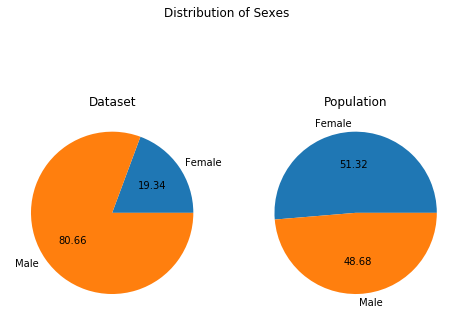

In [10]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(121)
plt.pie(sex_grouped['count'], labels=sex_grouped['sex'], autopct='%.2f')
ax1.set_title('Dataset')
ax2 = fig.add_subplot(122)
plt.pie([demo.loc['Total population', 'Female'], demo.loc['Total population', 'Male']], labels=['Female', 'Male'], autopct='%.2f')
ax2.set_title('Population')
fig.suptitle('Distribution of Sexes')
plt.savefig('dist_sex.png')

Demographic distribution as a comparison:

#### Age

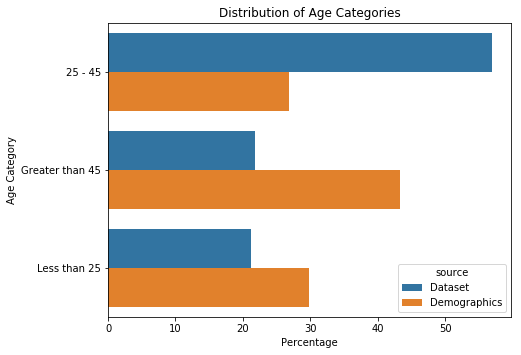

In [11]:
age_grouped = compas_two_year.groupby(['age_cat']).size().reset_index()
age_grouped.columns = ['age_cat', 'count']
age_grouped['source'] = 'Dataset'
age_grouped = age_grouped.append({'age_cat': 'Less than 25', 'count': demo.loc['Under 5 years' : '20 to 24 years', 'Total'].sum(), 'source': 'Demographics'}, ignore_index=True)
age_grouped = age_grouped.append({'age_cat': '25 - 45', 'count': demo.loc['25 to 29 years' : '40 to 44 years', 'Total'].sum(), 'source': 'Demographics'}, ignore_index=True)
age_grouped = age_grouped.append({'age_cat': 'Greater than 45', 'count': demo.loc['45 to 49 years' : '85 years and over', 'Total'].sum(), 'source': 'Demographics'}, ignore_index=True)
age_grouped['percentage'] = np.append(age_grouped.iloc[:3, 1] / age_grouped.iloc[:3, 1].sum() * 100,
                                      age_grouped.iloc[3:, 1] / age_grouped.iloc[3:, 1].sum() * 100)
plt.figure(figsize=(8, 6))
plt.gcf().subplots_adjust(left=0.2, bottom=0.2)
sns.barplot(y='age_cat', x='percentage', hue='source', data = age_grouped)
plt.xlabel('Percentage')
plt.ylabel('Age Category')
plt.title('Distribution of Age Categories')
plt.savefig('dist_age_cat.png')

Demographic distribution as a comparison:

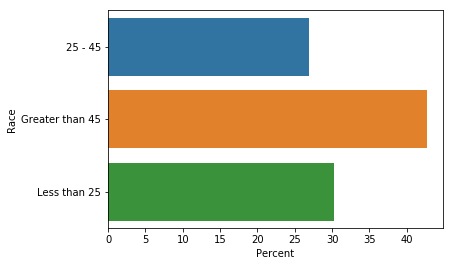

In [12]:
sns.barplot(x=[26.9, 27.7 + 15, 21.7 + 8.5], y=['25 - 45', 'Greater than 45', 'Less than 25'])
plt.xlabel('Percent')
plt.ylabel('Race');

#### Race

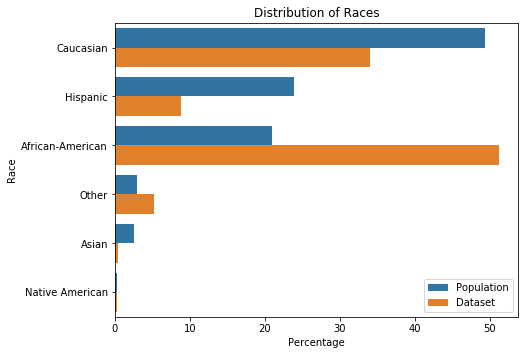

In [13]:
ethnic = compas_two_year.loc[:,["race"]]
ethnic_grouped = ethnic.groupby(["race"]).size().reset_index()
ethnic_grouped.columns = ["race","count"]
ethnic_grouped = ethnic_grouped.set_index('race')
ethnic_grouped['source'] = 'Dataset'
races['source'] = 'Population'
ethnic_grouped = ethnic_grouped.append(races.rename(columns={'Number': 'count'})).reset_index()
ethnic_grouped['percentage'] = np.append(ethnic_grouped['count'][:6].apply(lambda x: x / ethnic_grouped['count'][:6].sum()) * 100,
                                         ethnic_grouped['count'][6:].apply(lambda x: x / ethnic_grouped['count'][6:].sum()) * 100)
plt.figure(figsize=(8, 6))
plt.gcf().subplots_adjust(left=0.2, bottom=0.2)
sns.barplot(y='index', x='percentage', hue='source', data=ethnic_grouped.sort_values('count', ascending=False))
plt.xlabel('Percentage')
plt.ylabel('Race')
plt.legend(loc=4);
plt.title('Distribution of Races')
plt.savefig('dist_race.png')

Demographic distribution as a comparison:

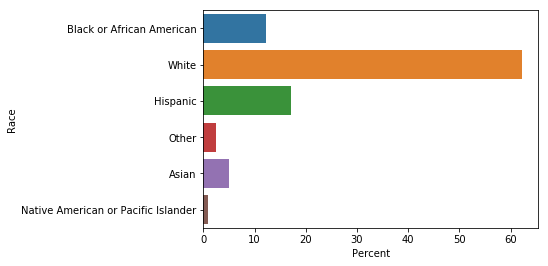

In [14]:
sns.barplot(x=[12.2, 62.3, 17.1, 2.4, 5.07, 0.82], y=['Black or African American', 'White', 'Hispanic', 'Other', 'Asian', 'Native American or Pacific Islander'])
plt.xlabel('Percent')
plt.ylabel('Race');

### Aequitas Auditting

In [15]:
df_eq = compas_two_year.loc[:, ['two_year_recid', 'decile_score', 'sex', 'age_cat', 'race']]
df_eq = df_eq.rename({'two_year_recid': 'label_value', 'decile_score': 'score'}, axis='columns')
df_eq.head()

,label_value,score,sex,age_cat,race
0,0,1,Male,Greater than 45,Other
1,1,3,Male,25 - 45,African-American
2,1,4,Male,Less than 25,African-American
3,0,8,Male,Less than 25,African-American
4,0,1,Male,25 - 45,Other


In [16]:
df_eq.to_csv('df_eq.csv')

We ran `Aequitas` from command line and obtained the result.

In [17]:
df_eq_aequitas = pd.read_csv('df_eq_aequitas.csv')

__Because the actions to take is punitive, we are interested in false positive rate parity.__

We select `male` as the reference. The acceptable 80% to 125% interval is marked by the red lines:

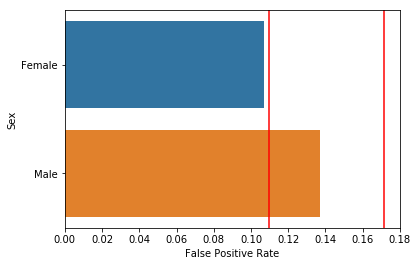

In [18]:
sns.barplot(x='fpr', y='attribute_value', data=df_eq_aequitas.loc[4:5, ['attribute_value', 'fpr']])
plt.axvline(df_eq_aequitas.loc[5, 'fpr'] * 0.8, c='r')
plt.axvline(df_eq_aequitas.loc[5, 'fpr'] * 1.25, c='r')
plt.xlabel('False Positive Rate')
plt.ylabel('Sex');

## Failed!

For age, we select `25-45` as the reference:

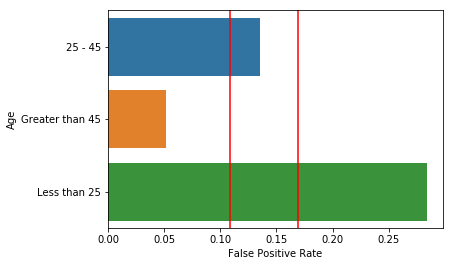

In [19]:
sns.barplot(x='fpr', y='attribute_value', data=df_eq_aequitas.loc[6:8, ['attribute_value', 'fpr']])
plt.axvline(df_eq_aequitas.loc[6, 'fpr'] * 0.8, c='r')
plt.axvline(df_eq_aequitas.loc[6, 'fpr'] * 1.25, c='r')
plt.xlabel('False Positive Rate')
plt.ylabel('Age');

## Failed!

We select `Caucasian` for reference for race:

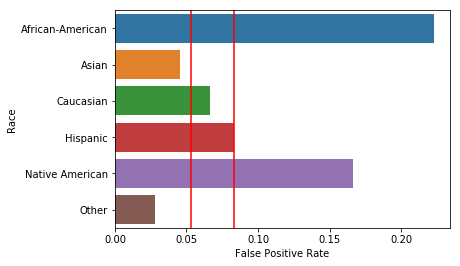

In [20]:
sns.barplot(x='fpr', y='attribute_value', data=df_eq_aequitas.loc[9:, ['attribute_value', 'fpr']])
plt.axvline(df_eq_aequitas.loc[11, 'fpr'] * 0.8, c='r')
plt.axvline(df_eq_aequitas.loc[11, 'fpr'] * 1.25, c='r')
plt.xlabel('False Positive Rate')
plt.ylabel('Race');

## Failed!

### Modeling

### Future Work

#### Possible Improvement

Data we are using now is just for Broward County. We need more data to generalize our conclusion.

#### Difficulty

COMPAS does not release data. At present we, and other reseachers, are only able to study the results of COMPAS algorithm, instead of investigating the algorithm itself.

#### Appeal

COMPAS’s data and algorithm should be public, just as the laws of a nation are publicly accessible and clearly articulated. 

#### In response to Prof Marshall's question